In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [5]:
train.shape

(245725, 11)

In [6]:
test.shape

(105312, 10)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [9]:
(train.isnull().sum()/train.shape[0])*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [10]:
(test.isnull().sum()/test.shape[0])*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

In [11]:
(train['Gender'].value_counts(dropna=False)/train.shape[0])*100

Male      54.612677
Female    45.387323
Name: Gender, dtype: float64

In [12]:
(test['Gender'].value_counts(dropna=False)/test.shape[0])*100

Male      54.794325
Female    45.205675
Name: Gender, dtype: float64

In [13]:
# Renaming column name inorder to make it meaningful
train.rename(columns = {'Gender':'Is_Male'}, inplace = True)
test.rename(columns = {'Gender':'Is_Male'}, inplace = True)

In [14]:
D1 = {'Male': 1,'Female': 0}

In [15]:
train.Is_Male = [D1[item] for item in train.Is_Male]
test.Is_Male  = [D1[item] for item in test.Is_Male]

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Is_Male              245725 non-null  int64 
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 20.6+ MB


In [17]:
train['Is_Active'].value_counts(dropna=False)

No     150290
Yes     95435
Name: Is_Active, dtype: int64

In [18]:
D2 = {'Yes': 1,'No': 0}

In [19]:
train.Is_Active = [D2[item] for item in train.Is_Active]
test.Is_Active  = [D2[item] for item in test.Is_Active]

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Is_Male              245725 non-null  int64 
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  int64 
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 20.6+ MB


In [21]:
train['Region_Code'].value_counts(dropna=False)

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

In [22]:
train['Occupation'].value_counts(dropna=False)

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

In [23]:
# Creating a dummy variable for the variable 'Occupation' and dropping the first one.
c1 = pd.get_dummies(train['Occupation'],prefix='Occupation',drop_first=True)
#Adding the results to the master dataframe
train = pd.concat([train,c1],axis=1)

In [24]:
train = train.drop('Occupation', axis=1) 

In [25]:
# Test Data
c2 = pd.get_dummies(test['Occupation'],prefix='Occupation',drop_first=True)
test = pd.concat([test,c2],axis=1)

In [26]:
test = test.drop('Occupation', axis=1) 

In [27]:
train['Channel_Code'].value_counts(dropna=False)

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

In [28]:
# Creating a dummy variable for the variable 'Channel_Code' and dropping the first one.
c3 = pd.get_dummies(train['Channel_Code'],prefix='Channel_Code',drop_first=True)
#Adding the results to the master dataframe
train = pd.concat([train,c3],axis=1)

In [29]:
train = train.drop('Channel_Code', axis=1) 

In [30]:
# Test Data
c4 = pd.get_dummies(test['Channel_Code'],prefix='Channel_Code',drop_first=True)
#Adding the results to the master dataframe
test = pd.concat([test,c4],axis=1)

In [31]:
test = test.drop('Channel_Code', axis=1) 

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ID                        245725 non-null  object
 1   Is_Male                   245725 non-null  int64 
 2   Age                       245725 non-null  int64 
 3   Region_Code               245725 non-null  object
 4   Vintage                   245725 non-null  int64 
 5   Credit_Product            216400 non-null  object
 6   Avg_Account_Balance       245725 non-null  int64 
 7   Is_Active                 245725 non-null  int64 
 8   Is_Lead                   245725 non-null  int64 
 9   Occupation_Other          245725 non-null  uint8 
 10  Occupation_Salaried       245725 non-null  uint8 
 11  Occupation_Self_Employed  245725 non-null  uint8 
 12  Channel_Code_X2           245725 non-null  uint8 
 13  Channel_Code_X3           245725 non-null  uint8 
 14  Chan

In [33]:
train['Region_Code'] = train['Region_Code'].str[2:]

In [34]:
test['Region_Code'] = test['Region_Code'].str[2:]

In [35]:
train['Region_Code'] = train['Region_Code'].astype(int)
test['Region_Code'] = test['Region_Code'].astype(int)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ID                        245725 non-null  object
 1   Is_Male                   245725 non-null  int64 
 2   Age                       245725 non-null  int64 
 3   Region_Code               245725 non-null  int32 
 4   Vintage                   245725 non-null  int64 
 5   Credit_Product            216400 non-null  object
 6   Avg_Account_Balance       245725 non-null  int64 
 7   Is_Active                 245725 non-null  int64 
 8   Is_Lead                   245725 non-null  int64 
 9   Occupation_Other          245725 non-null  uint8 
 10  Occupation_Salaried       245725 non-null  uint8 
 11  Occupation_Self_Employed  245725 non-null  uint8 
 12  Channel_Code_X2           245725 non-null  uint8 
 13  Channel_Code_X3           245725 non-null  uint8 
 14  Chan

In [37]:
train['Credit_Product'].value_counts(dropna=False)

No     144357
Yes     72043
NaN     29325
Name: Credit_Product, dtype: int64

In [38]:
(train['Credit_Product'].value_counts(dropna=False)/train.shape[0])*100

No     58.747380
Yes    29.318547
NaN    11.934073
Name: Credit_Product, dtype: float64

In [39]:
# Renaming column name inorder to make it meaningful
train.rename(columns = {'Credit_Product':'Credit_Product_Present'}, inplace = True)
test.rename(columns = {'Credit_Product':'Credit_Product_Present'}, inplace = True)

In [40]:
D3 = {'Yes': 1,'No': 0}

In [41]:
train['Credit_Product_Present'] = train['Credit_Product_Present'].fillna('No')
test['Credit_Product_Present'] = test['Credit_Product_Present'].fillna('No')

In [42]:
train.Credit_Product_Present = [D3[item] for item in train.Credit_Product_Present]
test.Credit_Product_Present  = [D3[item] for item in test.Credit_Product_Present]

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ID                        245725 non-null  object
 1   Is_Male                   245725 non-null  int64 
 2   Age                       245725 non-null  int64 
 3   Region_Code               245725 non-null  int32 
 4   Vintage                   245725 non-null  int64 
 5   Credit_Product_Present    245725 non-null  int64 
 6   Avg_Account_Balance       245725 non-null  int64 
 7   Is_Active                 245725 non-null  int64 
 8   Is_Lead                   245725 non-null  int64 
 9   Occupation_Other          245725 non-null  uint8 
 10  Occupation_Salaried       245725 non-null  uint8 
 11  Occupation_Self_Employed  245725 non-null  uint8 
 12  Channel_Code_X2           245725 non-null  uint8 
 13  Channel_Code_X3           245725 non-null  uint8 
 14  Chan

In [44]:
train.head()

,ID,Is_Male,Age,Region_Code,Vintage,Credit_Product_Present,Avg_Account_Balance,Is_Active,Is_Lead,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,NNVBBKZB,0,73,268,43,0,1045696,0,0,1,0,0,0,1,0
1,IDD62UNG,0,30,277,32,0,581988,0,0,0,1,0,0,0,0
2,HD3DSEMC,0,56,268,26,0,1484315,1,0,0,0,1,0,1,0
3,BF3NC7KV,1,34,270,19,0,470454,0,0,0,1,0,0,0,0
4,TEASRWXV,0,30,282,33,0,886787,0,0,0,1,0,0,0,0


In [45]:
# Removing Target Variable & storing separately
Y=train['Is_Lead']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Is_Lead, dtype: int64

In [46]:
# Dropping Target Variable & ID column
X=train.drop(['ID','Is_Lead'], axis=1)
X.head()

,Is_Male,Age,Region_Code,Vintage,Credit_Product_Present,Avg_Account_Balance,Is_Active,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,0,73,268,43,0,1045696,0,1,0,0,0,1,0
1,0,30,277,32,0,581988,0,0,1,0,0,0,0
2,0,56,268,26,0,1484315,1,0,0,1,0,1,0
3,1,34,270,19,0,470454,0,0,1,0,0,0,0
4,0,30,282,33,0,886787,0,0,1,0,0,0,0


In [47]:
Column1=test['ID']

In [48]:
# Removing Column ID before building the model
test=test.drop(['ID'], axis=1)

In [49]:
Scaler=StandardScaler()

In [50]:
X=Scaler.fit_transform(X)
test=Scaler.fit_transform(test)

In [51]:
LR = LogisticRegression()

In [52]:
# train test split with train_size=75% and test size=25%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70, random_state=101)

In [53]:
LR.fit(X_train, Y_train)
# Predict churn on test data using the model just built
Y_Pred_LR = LR.predict(X_test)
Accuracy_Logistic = round(LR.score(X_train, Y_train) * 100, 2)
Accuracy_Logistic

77.65

In [54]:
confusion = metrics.confusion_matrix(Y_test, Y_Pred_LR)
confusion

array([[55071,  1056],
       [15567,  2024]], dtype=int64)

In [55]:
# measure accuracy
metrics.accuracy_score(Y_test, Y_Pred_LR)

0.7745055481700535

In [56]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

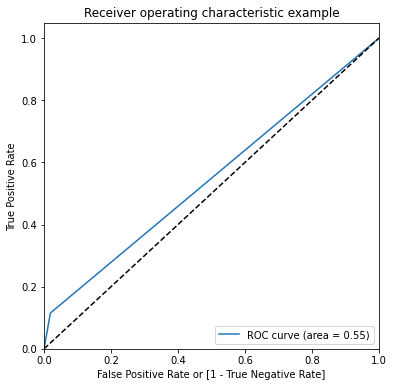

(array([0.        , 0.01881447, 1.        ]),
 array([0.        , 0.11505884, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [57]:
draw_roc(Y_test, Y_Pred_LR)

In [59]:
Test_Output_LR = LR.predict_proba(test)

In [61]:
d = {'ID':Column1,'Is_Lead':Test_Output_LR[:,1]}
answer = pd.DataFrame(d)

answer.to_csv('CreditCard_LR_v2.csv',index=False)